# Walmart
**Objective**: Predict the **Weekly Sales**

[Dataset Link](https://www.kaggle.com/datasets/yasserh/walmart-dataset)

In [27]:
import pandas as pd

In [28]:
dataset = pd.read_csv('datasets/Walmart.csv')

In [29]:
dataset = dataset.drop(['Store'], axis=1)

In [30]:
dataset

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
6430,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [31]:
numeric = dataset.columns.array[3:]
numeric

<PandasArray>
['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
Length: 4, dtype: object

In [32]:
dataset['Date'].describe()

count           6435
unique           143
top       05-02-2010
freq              45
Name: Date, dtype: object

In [33]:
dataset[['Date']] = dataset[['Date']].apply(pd.to_datetime)

In [34]:
dataset['Date'].describe()

count                    6435
unique                    143
top       2010-05-02 00:00:00
freq                       45
first     2010-01-10 00:00:00
last      2012-12-10 00:00:00
Name: Date, dtype: object

In [35]:
dataset

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
6430,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


## Initializing the PyCaret Environment

In [36]:
from pycaret.regression import *

In [37]:
s = setup(data=dataset, target='Weekly_Sales', train_size=0.8, numeric_features=numeric, categorical_features=['Holiday_Flag'], date_features=['Date'])

,Description,Value
0,Session id,8391
1,Target,Weekly_Sales
2,Target type,Regression
3,Original data shape,"(6435, 7)"
4,Transformed data shape,"(6435, 9)"
5,Transformed train set shape,"(5148, 9)"
6,Transformed test set shape,"(1287, 9)"
7,Ordinal features,1
8,Numeric features,4
9,Date features,1


In [38]:
best = compare_models(sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,373973.3419,221410296826.3271,470336.7423,0.2926,0.5092,0.5094,0.1060
gbr,Gradient Boosting Regressor,409262.7438,241732615119.9600,491507.5812,0.2277,0.5447,0.5779,0.1780
rf,Random Forest Regressor,394070.6697,288508758581.5070,536896.7926,0.0784,0.5567,0.5215,0.5400
ada,AdaBoost Regressor,469795.0016,303269135195.9787,550554.5985,0.0308,0.6224,0.7255,0.0660
ridge,Ridge Regression,463079.5435,304675954836.0766,551832.9084,0.0265,0.5995,0.6571,0.0260
lasso,Lasso Regression,463079.9526,304677270855.9127,551834.0832,0.0265,0.5995,0.6571,0.0280
llar,Lasso Least Angle Regression,463079.9526,304677270857.5716,551834.0832,0.0265,0.5995,0.6571,0.0250
lar,Least Angle Regression,463079.9664,304677375770.2798,551834.1748,0.0265,0.5995,0.6571,0.0250
lr,Linear Regression,463079.9664,304677375770.2798,551834.1748,0.0265,0.5995,0.6571,0.6300
br,Bayesian Ridge,463172.0940,304818510562.1178,551965.0649,0.0261,0.5997,0.6572,0.0280


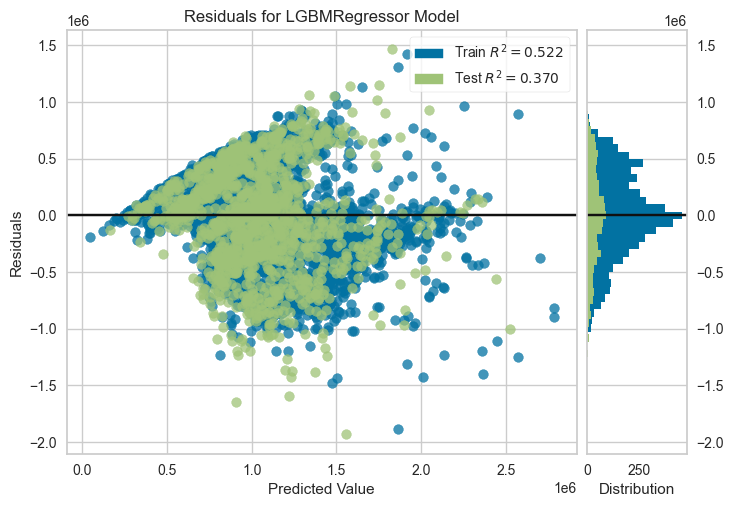

In [39]:
plot_model(best, plot='residuals')

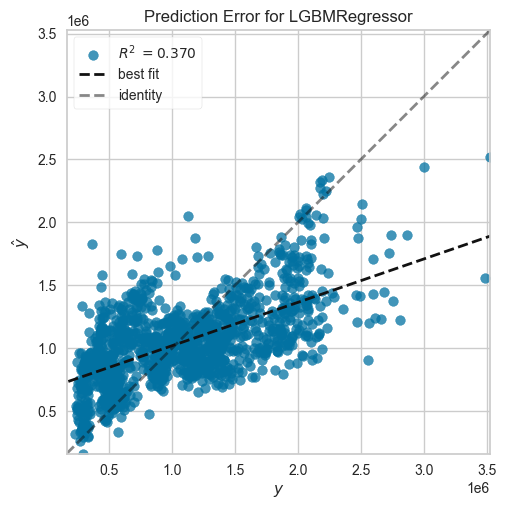

In [40]:
plot_model(best, plot='error')

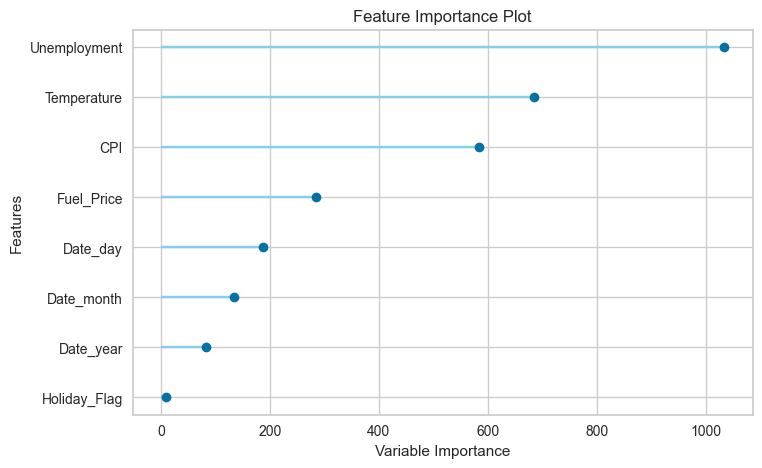

In [41]:
plot_model(best, plot='feature')

## Boosting Performance

In [42]:
s = setup(data=dataset, target='Weekly_Sales', train_size=0.8, numeric_features=numeric, categorical_features=['Holiday_Flag'], date_features=['Date'],
            normalize=True, feature_selection=True, remove_outliers=True, transformation=True)

  File "C:\Users\rafin\anaconda3\envs\pycaret\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\rafin\anaconda3\envs\pycaret\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\rafin\anaconda3\envs\pycaret\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\rafin\anaconda3\envs\pycaret\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1065
[LightGBM] [Info] Number of data points in the train set: 4890, number of used features: 8
[LightGBM] [Info] Start training from score 1041906.144983


,Description,Value
0,Session id,1446
1,Target,Weekly_Sales
2,Target type,Regression
3,Original data shape,"(6435, 7)"
4,Transformed data shape,"(6177, 2)"
5,Transformed train set shape,"(4890, 2)"
6,Transformed test set shape,"(1287, 2)"
7,Ordinal features,1
8,Numeric features,4
9,Date features,1


In [43]:
best = compare_models(sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,309752.4975,179496944828.5981,423437.4475,0.4391,0.4263,0.3787,0.2690
rf,Random Forest Regressor,310224.6075,179620181433.3431,423583.4256,0.4387,0.4268,0.3799,0.3500
et,Extra Trees Regressor,309915.4497,179619153049.7460,423584.6301,0.4387,0.4263,0.3789,0.3390
knn,K Neighbors Regressor,319447.5500,205037410713.6000,452566.4438,0.3587,0.4505,0.3862,0.2570
lightgbm,Light Gradient Boosting Machine,404876.8239,245663547666.7608,495457.0457,0.2323,0.5292,0.5486,0.3140
gbr,Gradient Boosting Regressor,409254.6818,247804742797.5818,497673.9576,0.2259,0.5384,0.5651,0.3050
ridge,Ridge Regression,467309.3052,316926060639.6308,562845.6650,0.0100,0.6061,0.6633,0.2520
omp,Orthogonal Matching Pursuit,467309.7257,316926075181.7387,562845.6811,0.0100,0.6061,0.6633,0.2630
lar,Least Angle Regression,467309.7257,316926075181.7387,562845.6811,0.0100,0.6061,0.6633,0.2450
lr,Linear Regression,467309.7257,316926075181.7387,562845.6811,0.0100,0.6061,0.6633,0.7950


**Without performance boost**
MAE|MSE|RMSE|R2|RMSLE|MAPE
---|---|----|--|-----|----
373973.3419|221410296826.3271|470336.7423|0.2926|0.5092|0.5094

**With performance boost**
MAE|MSE|RMSE|R2|RMSLE|MAPE
---|---|----|--|-----|----
3097152.4975|179496944828.5981|423437.4475|0.4391|0.4263|0.3787

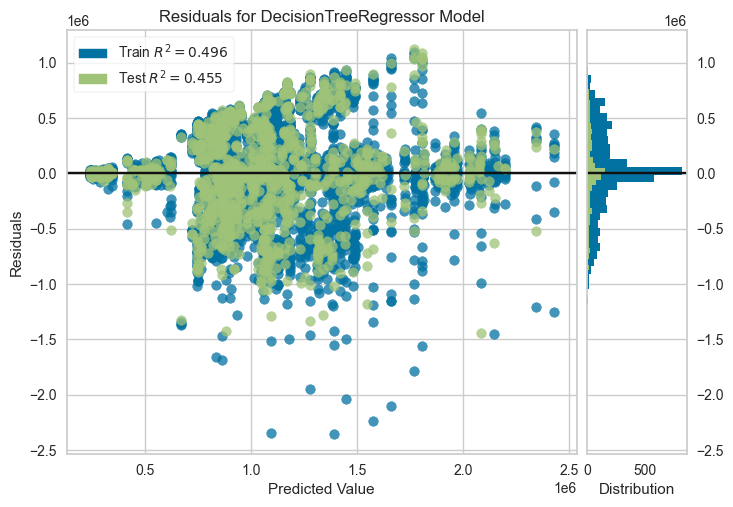

In [44]:
plot_model(best, plot='residuals')

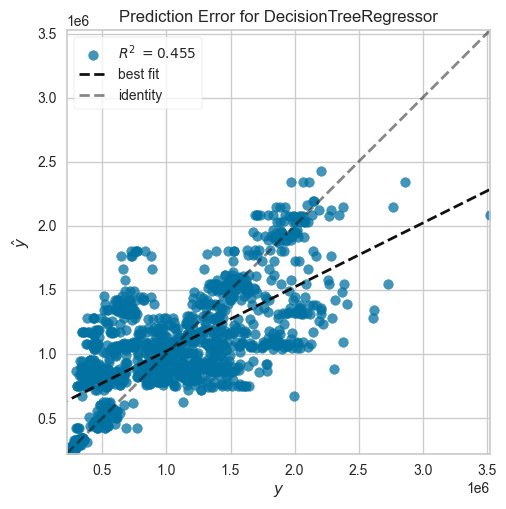

In [45]:
plot_model(best, plot='error')

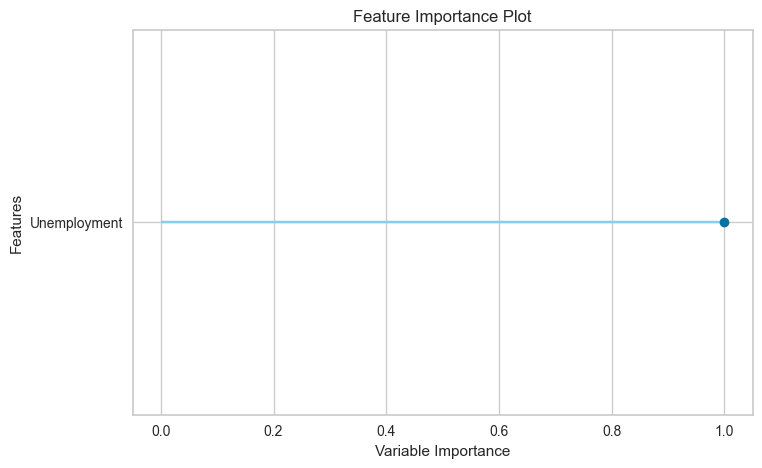

In [46]:
plot_model(best, plot='feature')

## Tunning the model

In [48]:
tuned_model = tune_model(best, optimize='RMSE', fold=15, n_iter=100, choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,298850.7086,159835419235.8365,399794.2211,0.4785,0.4332,0.3976
1,304913.6865,173141853943.7951,416103.1770,0.4424,0.4265,0.3790
2,319750.4615,178184296523.6902,422118.8180,0.4606,0.4324,0.3981
3,314206.5782,179468413185.0079,423637.1244,0.4600,0.4417,0.3962
4,320606.6282,190495995555.4472,436458.4695,0.3744,0.4184,0.3652
5,313472.9078,194763359063.7386,441320.0189,0.4056,0.4247,0.3679
6,328145.0585,192469120905.9362,438713.0280,0.4154,0.4362,0.3853
7,314995.2213,181814454095.9954,426397.0615,0.4202,0.4632,0.4367
8,292593.4343,163410895957.3976,404241.1359,0.4746,0.3948,0.3309


Fitting 15 folds for each of 100 candidates, totalling 1500 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Without performance boost**
MAE|MSE|RMSE|R2|RMSLE|MAPE
---|---|----|--|-----|----
373973.3419|221410296826.3271|470336.7423|0.2926|0.5092|0.5094

**With performance boost**
MAE|MSE|RMSE|R2|RMSLE|MAPE
---|---|----|--|-----|----
3097152.4975|179496944828.5981|423437.4475|0.4391|0.4263|0.3787

**Tunned Model**
MAE|MSE|RMSE|R2|RMSLE|MAPE
---|---|----|--|-----|----
319997.9468|188382979804.2060|433464.6955|0.4117|0.4393|0.3974

## Predict Model

In [49]:
predictions = predict_model(tuned_model)
predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,305685.0455,169065919515.2720,411176.2633,0.4548,0.4204,0.3722


,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales,prediction_label
3286,2012-12-10,0,48.099998,4.029,138.911697,4.145,1.412925e+06,1.152328e+06
5628,2011-01-28,0,9.510000,3.243,133.105972,5.114,7.759104e+05,1.009336e+06
3048,2010-12-17,0,30.459999,3.139,136.529282,8.572,1.527683e+06,1.224615e+06
2967,2012-02-24,0,54.810001,3.555,220.275940,7.057,7.470991e+05,1.059396e+06
6361,2011-03-06,0,76.379997,3.922,185.754501,8.521,8.774234e+05,1.440301e+06
...,...,...,...,...,...,...,...,...
1674,2012-01-13,0,48.070000,3.657,130.244003,12.187,8.654679e+05,9.201496e+05
2186,2010-11-19,0,27.260000,2.758,191.031219,6.986,4.586347e+05,5.519305e+05
239,2011-09-12,0,41.759998,3.158,218.605042,7.441,2.290549e+06,1.276662e+06
3358,2011-03-06,0,73.120003,4.069,134.855164,8.212,1.554838e+06,1.274306e+06


## Finalizing and Saving Model

In [50]:
final_model = finalize_model(tuned_model)
save_model(final_model, 'walmart_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(include=['Date'],
                                     transformer=ExtractDateTimeFeatures())),
                 ('numerical_imputer',
                  TransformerWrapper(include=<PandasArray>
 ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
 Length: 4, dtype: object,
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper...
                 ('transformation',
                  TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('feature_selection',
                  TransformerWrapper(exclude=[],
                                     transformer=SelectFromModel(estimator=LGBMRegressor(),
                                                                 max_